### Linear regression

Consider a dataset that cannot be made to fit exactly onto a line.

How can you find a line of best fit?

The geometric intuition, for an independent variable a dependent variable, is a line through a 2d linear space. The line doesn't have to pass through the origin. It must have a y-intercept.

Let:

$ \beta_0 $ be the y intercept 

$ \beta_1 $ be the gradient 

$ e_i $ be the error. AKA the distance of the line (introduced below) away from a data point at $ i $ 

A line to fit this data can be described as:

$ y_i = \beta_0 + \beta_1 x_i + e_i $

If the goal is to find $ \beta_0, \beta_1 $ while minimising $ e_i $

Then:

$ \normalsize e_i = y_i - (\beta_0 + \beta_1 x_i) $

Rather than just one $ e_i $, we want to find the values for all of those, so we should write it as:

$ \normalsize e = \sum_{i=1}^n y_i - (\beta_0 + \beta_1 x_i) $

But this poses a new problem: terms may cancel each other out (data above and below the line). Therefore, let's compute the sum of squares:

$ \normalsize e = \sum_{i=1}^n \left[ y_i - \beta_0 - \beta_1 x_i) \right]^2 $

With two variables to find, we can use partial derivatives.

First, find the derivative in terms of $ \beta_0 $ and treat $ \beta_1 $ as a constant.

$ \large \frac{\partial}{\partial \beta_0} \normalsize \sum_{i=1}^n \left[ y_i - \beta_0 - \beta_1 x_i) \right]^2 = 0 $

Here, the partial derivative is equal to 0 because the purpose is to minimise the loss function $ e $, and the loss function's minima will mean the rate of change, aka the derivative, is 0 at that minima.

Using the chain rule, this becomes:

$ \large \frac{\partial}{\partial \beta_0} \normalsize \sum_{i=1}^n 2 \left[ y_i - \beta_0 - \beta_1 x_i \right] (-1) = 0 $

$ \large \frac{\partial}{\partial \beta_0} \normalsize \sum_{i=1}^n -2 \left[ y_i - \beta_0 - \beta_1 x_i \right] = 0 $

$ \large \frac{\partial}{\partial \beta_0} \normalsize \sum_{i=1}^n \frac{\left[ y_i - \beta_0 - \beta_1 x_i \right]}{-2} = \frac{0}{-2} $

Since this doesn't make sense, let's ignore the -2

$ \large \frac{\partial}{\partial \beta_0} \normalsize \sum_{i=1}^n y_i - \sum_{i=1}^n \beta_0 - \sum_{i=1}^n \beta_1 x_i = 0 $

$ \beta_0 $ here has a single value. Therefore it is $ n\beta_0 $

$ \large \frac{\partial}{\partial \beta_0} \normalsize \sum_{i=1}^n y_i - n\beta_0 -  \beta_1 \sum_{i=1}^n x_i = 0 $

We now need to find the other partial derivative

$ \large \frac{\partial}{\partial \beta_1} \normalsize \sum_{i=1}^n \left[ y_i - \beta_0 - \beta_1 x_i) \right]^2 = 0 $

$ \large \frac{\partial}{\partial \beta_1} \normalsize \sum_{i=1}^n 2 \left[ y_i - \beta_0 - \beta_1 x_i) \right] (-x_i) = 0 $

$ \large \frac{\partial}{\partial \beta_1} \normalsize \sum_{i=1}^n -2x_i \left[ y_i - \beta_0 - \beta_1 x_i) \right] = 0 $

For the same reason as last time, after dividing by 2, this becomes

$ \large \frac{\partial}{\partial \beta_1} \normalsize \sum_{i=1}^n x_i \left[ y_i - \beta_0 - \beta_1 x_i) \right] = 0 $

$  \large \frac{\partial}{\partial \beta_1} \normalsize \sum_{i=1}^n y_i x_i - \beta_0 \sum_{i=1}^n x_i -  \beta_1 \sum_{i=1}^n x_i^2 = 0 $

Now you have two linear equations and can solve this as simultaneous equations. We can use the elimination method to derive the $ \beta_0, \beta_1 $ separately.

$ [1] : \sum_{i=1}^n y_i - n\beta_0 -  \beta_1 \sum_{i=1}^n x_i = 0 $

$ [2] : \sum_{i=1}^n y_i x_i - \beta_0 \sum_{i=1}^n x_i -  \beta_1 \sum_{i=1}^n x_i^2 = 0 $

#### TODO - show how to solve equations using elimination of simultaneous equations

beta_0 =  7.6704
beta_1 =  0.81993


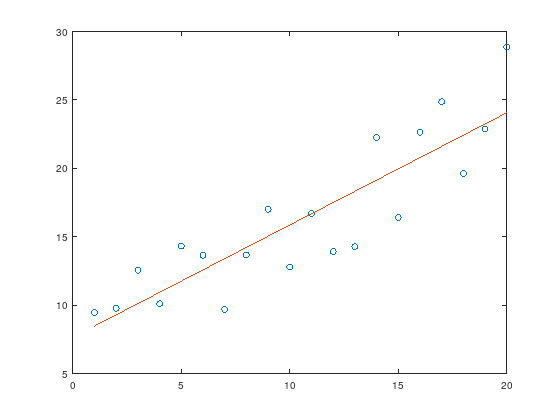

In [1]:
X = [1:20];
n = length(X);
Y = rand(1,20).*10 + X;
plot(X, Y, "o");

beta_1 = (n * dot(X,Y) - sum(X)*sum(Y))/(n * sum(X.^2) - sum(X)^2);
beta_0 = (1/n)* sum(Y) - beta_1 * (1/n) * sum(X);

regressionLine = beta_0 + X*beta_1;

line(X,regressionLine);

beta_0
beta_1

### In terms of covariance and variance (probably more intuitive)

You can calculate the slope of the line with:

$ \beta_1 = \large \frac{cov(x,y)}{var(x)} $

Where

$ n $ is the population, $ n-1 $ is for the sample. Octave uses $n-1$

$ \frac{S_{xy}}{n-1} $ aka covariance:

$ \frac{\sum{(x_i - \bar x)} \sum{(y_i - \bar y)}}{n-1}$

$ \frac{S_{xx}}{n-1} $ aka variance aka $ s^2 $ for a sample :

$ \frac{\sum{(x_i - \bar x)}^2}{n-1}$

Therefore:

$ \beta_1 = \frac{cov(x,y)}{var(x)} = \frac{S_{xy}}{n-1} / \frac{S_{xx}}{n-1} = \frac{S_{xy}}{S_{xx}} $

And since

$ \bar{y} = \beta_0 + \beta_1 \bar{x} $

Then:

$ \beta_0 = \bar{y} - \beta_1 \bar{x} $

In [2]:
b_1 = cov(X, Y)/var(X)
b_0 = mean(Y) - b_1 * mean(X)

b_1 =  0.81993
b_0 =  7.6704


Is equivalent to...

In [5]:
x_bar = mean(X);
y_bar = mean(Y);

S_xy = sum((X .- x_bar).*(Y .- y_bar));
S_xx = sum((X .- x_bar).^2);

b_1 = S_xy/S_xx
b_0 = mean(Y) - b_1 * mean(X)

b_1 =  0.81993
b_0 =  7.6704


### Some intuition

This site - https://www.statology.org/covariance-vs-variance/ - describes:

covariance, $ \frac{S_{xy}}{n-1} $: a measure of how changes in one variable are related to the changes in another variable. $ n-1 $ is for a sample.

variance, $ S_{xx} $: how spread out the data are

Therefore:

$\frac{S_{xy}}{n-1} / \frac{S_{xx}}{n-1} = \frac{S_{xy}}{S_{xx}}$ means "How we can understand changes in Y (the rise) in terms of how spread out the variable X is (the run)". This seems somewhat like the rise/run formula for finding any linear gradient.